# Exploration Numérique 1
### MAP-433 - statistiques

Gr 5

Guilherme Vieira, João Andreotti, Nicolas Lopes

## 1.

Comme $S$ est une application continue et différenciable sur $\mathcal{R^2}$, on cherche con minimum global en étudiant les minimums locales, qui satisfont l'equation:

\begin{equation*}
    \nabla_{\beta_1, \beta_2}S = \vec{0}
\end{equation*}

On établit la notation $\vec{\beta} = [\beta_1, \beta_2]^T$ et $\tilde{t} = [\vec{1}, \vec{t}]$. Alors, on a:


\begin{equation*}
    \nabla_{\vec{\beta}}S(\hat{\vec{\beta}}) = - 2 \tilde{t}^T (\vec{X} - \tilde{t}\vec{\beta}) =  \vec{0}
\end{equation*}

Comme $\tilde{t}^T \tilde{t}$ est une matrice carré inversible (en supposant que la famille $\{ \vec{t}, \vec{1} \}$ est libre), alors: 


\begin{equation*}
    \hat{\vec{\beta}} = \left( \tilde{t}^T \tilde{t}  \right)^{-1} \tilde{t}^T \vec{X}
\end{equation*}


On peut montrer que cette solution est unique et correspond au minimum globale de la fonction $S$.

En dévelopant les expressions on arrive a montrer que:


\begin{equation*}
    \hat{\beta_2} = \frac{\sum_{i = 1}^n (t_i - \bar{t}) X_i}{ \sum_{i=1}^n (t_i - t)^2}
\end{equation*}

\begin{equation*}
    \hat{\beta_1} = \bar{X} - \hat{\beta_2}\bar{t}
\end{equation*}

# 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import t as student


from typing import Tuple


In [2]:
# Reading the data into a pandas dataframe
GLB_data = pd.read_csv("GLB.Ts+dSST.csv", header=1)
GLB_data = GLB_data[1:-2] # removing years with missing values
GLB_data["J-D"] = GLB_data["J-D"].astype(float) # Converts means to floats
GLB_data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1,1881,-0.19,-0.14,0.04,0.05,0.07,-0.18,0.01,-.03,-.15,-.22,-.18,-.07,-0.08,-.09,-.17,0.05,-.07,-.18
2,1882,0.16,0.14,0.05,-0.16,-0.13,-0.22,-0.16,-.07,-.14,-.23,-.17,-.36,-0.11,-.08,.08,-0.08,-.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.19,-0.18,-0.07,-0.07,-.14,-.22,-.11,-.24,-.11,-0.18,-.20,-.34,-0.16,-.09,-.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-.28,-.27,-.25,-.33,-.31,-0.28,-.27,-.11,-0.37,-.31,-.28
5,1885,-0.58,-0.33,-0.26,-0.42,-0.45,-0.44,-0.34,-.31,-.29,-.24,-.24,-.10,-0.33,-.35,-.41,-0.38,-.36,-.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.17,1.37,1.36,1.10,0.95,0.80,0.84,1.02,.90,.88,.91,.86,1.01,1.04,1.23,1.14,.89,.90
137,2017,1.02,1.14,1.16,0.94,0.91,0.72,0.82,.87,.77,.90,.88,.93,0.92,.92,1.01,1.01,.80,.85
138,2018,0.82,0.84,0.88,0.89,0.82,0.77,0.82,.76,.80,1.01,.82,.92,0.85,.85,.86,0.86,.79,.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,.94,.92,1.01,.99,1.09,0.98,.96,.93,1.01,.93,.97


Text(0, 0.5, 'Temperature Anomaly [°C]')

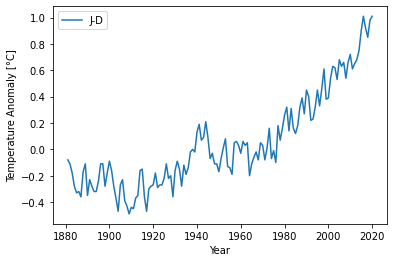

In [3]:
# Plotting and visualizing the data
ax = GLB_data.plot(
    x='Year', 
    y='J-D')

ax.set_ylabel("Temperature Anomaly [°C]")

# 3
Estimation des paramètres

In [4]:
# We convert the data to numpy arrays
t = np.array(GLB_data['Year'], dtype=int)
X = np.array(GLB_data['J-D'], dtype=float)
one = np.ones_like(t)

In [5]:
# Funciton to calculate estimators
def calculate_estimators(t: np.array, X: np.array) -> Tuple[float, float, float]:
    t_bar = t.mean()
    X_bar = X.mean()
    n = len(t)

    beta_2_est = (t - t_bar) @ X / ((t - t_bar) @ (t - t_bar))
    beta_1_est = X_bar - beta_2_est * t_bar
    X_hat = beta_1_est + beta_2_est * t
    epsilon_hat = X - X_hat
    sigma_2_hat = epsilon_hat @ epsilon_hat / (n - 2)

    return beta_1_est, beta_2_est, sigma_2_hat


In [6]:
delta_t = 30
t_len = 10

In [7]:
# calculating the estimators every 10 years in a 30 years interval 
t0 = t[0]
tf = t[-1]

ranges = [
    range(time, time + delta_t) 
    for time in range(0, len(t) - delta_t, t_len)
]
ranges = np.array(ranges)
times = ranges + t0
estimators = np.array([
    calculate_estimators(t[r], X[r])
    for r in ranges
])

estimators

array([[ 1.17521869e+01, -6.34037820e-03,  1.12774861e-02],
       [ 8.06885206e+00, -4.38932147e-03,  1.22446194e-02],
       [-9.95107453e+00,  5.03893215e-03,  1.02644319e-02],
       [-2.24428024e+01,  1.15461624e-02,  8.35584830e-03],
       [-2.04927208e+01,  1.05361513e-02,  1.33537121e-02],
       [-4.42806452e+00,  2.25806452e-03,  1.43103687e-02],
       [ 6.02434038e+00, -3.08787542e-03,  1.06317909e-02],
       [-1.01532614e+01,  5.16573971e-03,  1.00866344e-02],
       [-2.86208951e+01,  1.45383760e-02,  1.06376868e-02],
       [-3.27925488e+01,  1.66340378e-02,  1.01454701e-02],
       [-3.46579577e+01,  1.75795328e-02,  8.31830923e-03]])

$$
[\hat{\beta}_1, \hat{\beta}_2, \hat{\sigma}^2]
$$

# 4

I) Déterminons d'abord pour $\sigma^{2}$. Nous avons que :

$$
\frac{n-2}{\sigma^{2}} \hat{\sigma}^{2}\sim \chi^{2}_{(n-2)} 
$$

Nous cherchons avoir un intervale de confiance avec $\alpha$. En utilisant les quantiles d'une loi de $\chi^{2}_{(n-2)}$ nous pouvons écrire que:

$$
\mathbb{P}\left[q_{\alpha/2}^{\chi^{2}_{n-2}} \leq \frac{n-2}{\sigma^{2}}\hat{\sigma}^{2} \leq q_{1-\alpha/2}^{\chi^{2}_{n-2}} \right] = 1- \alpha
$$

Donc:

$$
\mathbb{P}\left[\frac{(n-2)\hat{\sigma}^{2}}{q^{\chi^{2}_{(n-2)}}_{1-\alpha/2}} \leq \sigma^{2} \leq \frac{(n-2)\hat{\sigma}^{2}}{q^{\chi^{2}_{(n-2)}}_{\alpha/2}} \right] = 1- \alpha
$$

Nous avons donc que l'intervale de confiance pour $\sigma^{2}$ avec $\alpha$ est:

$$
\boxed{I_{1-\alpha} (\sigma^{2}) = \left[\frac{(n-2)\hat{\sigma}^{2}}{q^{\chi^{2}_{(n-2)}}_{1-\alpha/2}} , \frac{(n-2)\hat{\sigma}^{2}}{q^{\chi^{2}_{(n-2)}}_{\alpha/2}} \right]}
$$

II) Soit $j\in \{1,2\}$. Déterminons l'intervale de confience $\alpha$ pour $\beta_{j}$. Nous avons que :

$$
\frac{\hat{\beta}_{j} - \beta_{j}}{\hat{\sigma}_{j}} \sim T_{n-2}
$$

Nous cherchons avoir un intervale de confiance avec $\alpha$. En utilisant les quantiles d'une loi de $\chi^{2}_{(n-2)}$ nous pouvons écrire que:

$$
\mathbb{P}\left[q_{\alpha/2}^{T_{n-2}} \leq \frac{\hat{\beta}_{j} - \beta_{j}}{\hat{\sigma}_{j}} \leq q_{1-\alpha/2}^{T_{n-2}} \right] = 1- \alpha
$$

Donc:

$$
\mathbb{P}\left[ \hat{\beta}_{j} - \hat{\sigma}_{j}q_{1-\alpha/2}^{T_{n-2}} \leq \beta_{j}\leq \hat{\beta}_{j}  - \hat{\sigma}_{j}q_{\alpha/2}^{T_{n-2}}\right] = 1- \alpha
$$


Nous avons donc que l'intervale de confiance pour $\beta_{j}$ avec $\alpha$ est:

$$
\boxed{I_{1-\alpha} (\beta_{j}) = \left[ \hat{\beta}_{j} - \hat{\sigma}_{j}q_{1-\alpha/2}^{T_{n-2}} ,\hat{\beta}_{j}  - \hat{\sigma}_{j}q_{\alpha/2}^{T_{n-2}}\right]}
$$

III)

L'intervalle de confiance autour de la droite de régression est determiné par le résidu de prédiction:
$$
\hat{\varepsilon}_i = X_i - \hat{X}_i = X_i - \hat{\beta}_2 t - \hat{\beta}_1
$$

Nous avons, donc que:
$$
\frac{\hat{\varepsilon}_i}{\hat{\sigma}_1} \sim T_{n-2}
$$

Or, cela implique que:
$$
\boxed{I_{1-\alpha} (X_{j}) = \left[ \hat{X}_{j} - \hat{\sigma}_{1}q_{1-\alpha/2}^{T_{n-2}} ,\hat{X}_{j}  - \hat{\sigma}_{1}q_{\alpha/2}^{T_{n-2}}\right]}
$$

Obtenons numériquement leur valeur pour $\alpha = 0.05$

In [8]:
def sigma_2_confidence_interval(t: np.array, X: np.array, n: int, alpha: float):
    beta_1_hat, beta_2_hat, sigma_2_hat = calculate_estimators(t, X)
    lower_bound = (n - 2) * sigma_2_hat / chi2.ppf(1 - alpha / 2, n - 2)
    upper_bound = (n - 2) * sigma_2_hat / chi2.ppf(alpha / 2, n - 2)
    return lower_bound, upper_bound

In [9]:
def beta_1_confidence_interval(t: np.array, X: np.array, n: int, alpha: float):
    beta_1_hat, beta_2_hat, sigma_2_hat = calculate_estimators(t, X)
    sigma_2_j_hat = sigma_2_hat * (t**2).sum() / (n * ((t - t.mean())**2).sum())
    sigma_j_hat = np.sqrt(sigma_2_j_hat)
    lower_bound = beta_1_hat - sigma_j_hat * student.ppf(1 - alpha / 2, n - 2)      
    upper_bound = beta_1_hat - sigma_j_hat * student.ppf(alpha / 2, n - 2)
    return lower_bound, upper_bound

In [10]:
def beta_2_confidence_interval(t: np.array, X: np.array, n: int, alpha: float):
    beta_1_hat, beta_2_hat, sigma_2_hat = calculate_estimators(t, X)
    sigma_2_j_hat = sigma_2_hat / ((t - t.mean())**2).sum()
    sigma_j_hat = np.sqrt(sigma_2_j_hat)
    lower_bound = beta_2_hat - sigma_j_hat * student.ppf(1 - alpha / 2, n - 2)      
    upper_bound = beta_2_hat - sigma_j_hat * student.ppf(alpha / 2, n - 2)
    return lower_bound, upper_bound

In [11]:
def prediction_uncertainty(t: np.array, X: np.array, n: int, alpha: float):
    _, _, sigma_2_hat = calculate_estimators(t, X)
    return student.ppf(1 - alpha / 2, n - 2) * np.sqrt(sigma_2_hat)

In [12]:
alpha = 0.05
n = len(ranges[0])

confidence_intervals = [
    (
        beta_1_confidence_interval(t[r], X[r], n, alpha),
        beta_2_confidence_interval(t[r], X[r], n, alpha),
        sigma_2_confidence_interval(t[r], X[r], n, alpha),
        prediction_uncertainty(t[r], X[r], n, alpha)
    )
    for r in ranges
]

confidence_intervals


[((3.0545574932863424, 20.44981625532322),
  (-0.010928897693893522, -0.001751858702102027),
  (0.00710220393377239, 0.020627938802648297),
  0.2175316387139444),
 ((-1.0418639664336187, 17.17956808211771),
  (-0.009170545312657163, 0.00039190237606094667),
  (0.007711273901226003, 0.022396947146019072),
  0.22666732893952182),
 ((-18.336410734135857, -1.565738320369146),
  (0.0006613541765281101, 0.009416510117131512),
  (0.006464214458780436, 0.0187749354293873),
  0.20753136394637806),
 ((-30.047984434606093, -14.837620311407996),
  (0.007596484279764446, 0.01549584052557482),
  (0.005262248886136066, 0.015283896238369787),
  0.1872455713082802),
 ((-30.15689952771755, -10.828542074062213),
  (0.005543083805717633, 0.015529218752680589),
  (0.008409745356877338, 0.024425616919081964),
  0.23671037045548984),
 ((-14.484113388846628, 5.627984356588561),
  (-0.0029107606463023663, 0.0074268896785604326),
  (0.009012217417444684, 0.026175462025133083),
  0.24504265674697231),
 ((-2.6879

$$
((\beta_{1, min}, \beta_{1, max}), (\beta_{2, min}, \beta_{2, max}), (\sigma^{2}_{min}, \sigma^{2}_{max}), \hat{\sigma}_{1}q_{1-\alpha/2}^{T_{n-2}})
$$

# 5

In [13]:
def plot_interval(X, t, plot_range,  beta_1_hat, beta_2_hat, epsilon_ci):
    plot_lower, plot_upper = plot_range[0], plot_range[-1]
    plt.plot(plot_range, beta_1_hat + beta_2_hat * plot_range)
    max_left = beta_1_hat + beta_2_hat * plot_lower + epsilon_ci
    min_left = beta_1_hat + beta_2_hat * plot_lower - epsilon_ci
    min_right = beta_1_hat + beta_2_hat * plot_upper - epsilon_ci
    max_right = beta_1_hat + beta_2_hat * plot_upper + epsilon_ci
    plt.fill_between([plot_lower, plot_upper], 
        [max_left, max_right], 
        [min_left, min_right],
        alpha=0.35,
    )

Pour changer les périodes pour lesquelles la droite de régression est visualisée, changer la variable <em>"plot_periods"</em>

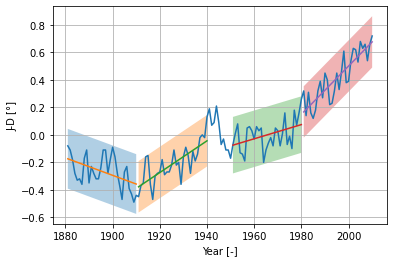

In [14]:
plot_periods = [0, 3, 7, 10] # Change this value to change plotted periods [0, 10]

lost_pts = t[-1] - times[-1][-1]
plt.plot(t[:-lost_pts], X[:-lost_pts])
for time_interval in plot_periods:
    beta_1_hat, beta_2_hat, _, = estimators[time_interval]
    beta_1_interval, beta_2_interval, _, prediction_uncertainty = confidence_intervals[time_interval]
    time = times[time_interval]
    rang = ranges[time_interval]
    
    plot_interval(
        X, 
        t,
        time,
        beta_1_hat, 
        beta_2_hat,
        prediction_uncertainty
    )
    
plt.xlabel("Year [-]")
plt.ylabel("J-D [°]")
plt.grid()
plt.show()

# 6


In [15]:
# Calculating the p-value
def p_value(t, X, n):
    beta_1_hat, beta_2_hat, sigma_2_hat = calculate_estimators(t, X)
    sigma_2_j_hat = sigma_2_hat / ((t - t.mean()) @ (t - t.mean()))
    return 2 * (1 - student.cdf(np.abs(beta_2_hat) / np.sqrt(sigma_2_j_hat), n - 2))

In [16]:
p_values = [
    p_value(t[r], X[r], n)
    for r in ranges
]
p_values

[0.008505785813796463,
 0.07047873226794543,
 0.025598638615577318,
 1.8893823596766168e-06,
 0.00017604854704034167,
 0.3784841191076409,
 0.16672427700696524,
 0.021350839327671567,
 2.9776871546260963e-07,
 1.5792273933001866e-08,
 6.776170735633968e-10]

# 7

## Conclusion
Les p-valeurs indiquent que pendant plusieurs périodes de 30 ans le coefficient angulaire de la régression est différent de zéro (à niveau $\alpha=0.05$). Notamment, pour toutes périodes s’amorçant après 1960 le coefficient $\beta_2$ est positif et les p-valeurs sont inférieures à $10^{-7}$. Cela est indicatif d’un réchauffement de la planète pendant les dernières décennies qui correspondent à celles où les émissions de gaz à effet de serre ont été les plus élevées [1]. Cela dit, l'analyse réalisée ne permet pas d'établir un lien de causalité entre ces deux quantités (quoique cette relation ait été établie par d'autres études).

[1] - https://ourworldindata.org/co2-dataset-sources